# Part 2: Mean (theory) to mean (simulation) ratio.

The direct way to mimic an active manager’s portfolio selection is to randomly pick a finite number of stocks from the distribution. To simulate the process, we form a portfolio of $N$ stocks by drawing $N$ random numbers from the log-normal distribution and summing them to obtain the
aggregate performance. The parameters of the log-normal distribution for each index have been derived in Part 1.

Theoretical model for finite sums of random variables distributed lognormally: [Broad distribution effects in sums of lognormal random variables. Eur. Phys. J. B 32, 513–525 (2003).](https://doi.org/10.1140/epjb/e2003-00131-6). Numerical simulation: Monte-Carlo sampling.

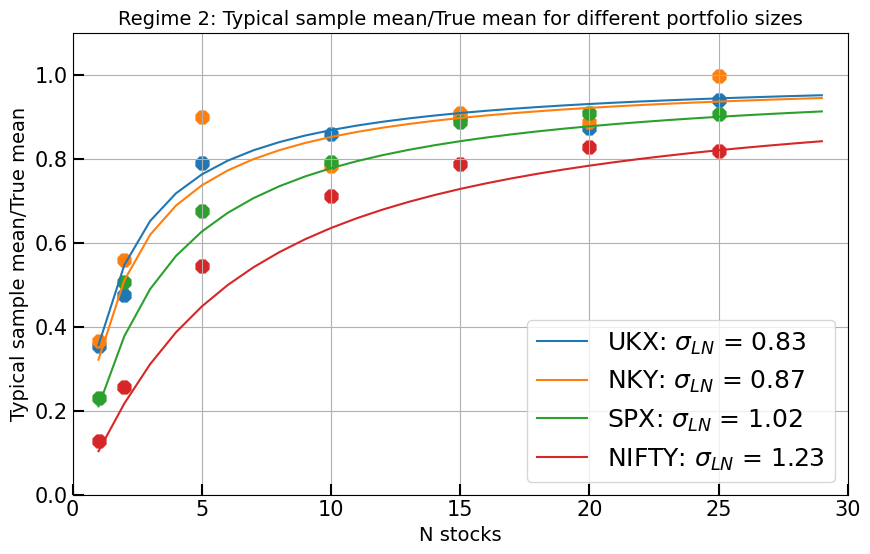

In [5]:
import matplotlib.pyplot as plt
from src.finitesample import get_real_sigma_dict, get_test_sigma_dict, mode_theory, mode_montecarlo

# parameters for the simulation
n_portfolio = range(1,30)               # sample size/portfolio size 
n_portfolio_mc = [1,2,5,10,15,20,25]    # points for mc simulation

# 
regime = 2

sigma_dict = get_real_sigma_dict()

plt.rcParams.update(plt.rcParamsDefault)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.rcParams['axes.linewidth'] = 2.0

for index_name in sigma_dict:

    # parameters of the lognormal distribution
    sigma_ln = sigma_dict[index_name]['sigma']
    mu_ln = sigma_dict[index_name]['mu']

    # theoretical 
    mode_th = [mode_theory(sigma_ln, N, regime=regime) for N in n_portfolio]

    # monte-carlo simulation  
    mode_mc = [mode_montecarlo(sigma_ln, mu_ln, N, bin_low=0.01, bin_high=1.1) for N in n_portfolio_mc]

    plt.plot(n_portfolio, mode_th, label = index_name + r': $\sigma_{LN}$ = ' + str(sigma_ln))
    plt.scatter(n_portfolio_mc, mode_mc, marker='8', s=100)

ax.set_xlabel('N stocks', size=14)
ax.set_ylabel('Typical sample mean/True mean', size = 14) 
ax.set_title(f'Regime {regime}: Typical sample mean/True mean for different portfolio sizes', size=14)

ax.set_xlim([0, 30])   
ax.set_ylim([0,1.1]) 

ax.legend(loc ='lower right', fontsize=18)

ax.tick_params(axis='both', which='major', direction='in', length=8, width=1.5, colors='black', labelsize=15)

plt.grid()
plt.savefig('sample_mean_vs_true_mean.png', dpi=300, bbox_inches='tight')  